<a href="https://colab.research.google.com/github/Ghost2158/green-grid-africa/blob/main/energy_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pprint
%matplotlib inline


In [34]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AEP_hourly.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(5),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

print("="*50)
print(df.shape)

First Five Rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

Null Values t  

Datetime    0
AEP_MW      0
dtype: int64 

(121273, 2)



## Reformat the Date Time columns




In [35]:
# Extract all Data Like Year MOnth Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday


Seeing how many unique year we have

In [36]:
# How many Unique Year do we Have in Dataset
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



Let see energy consumption each yrs using seaborn

/tmp/ipython-input-37-2064649331.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Energy Consumption According to Year')

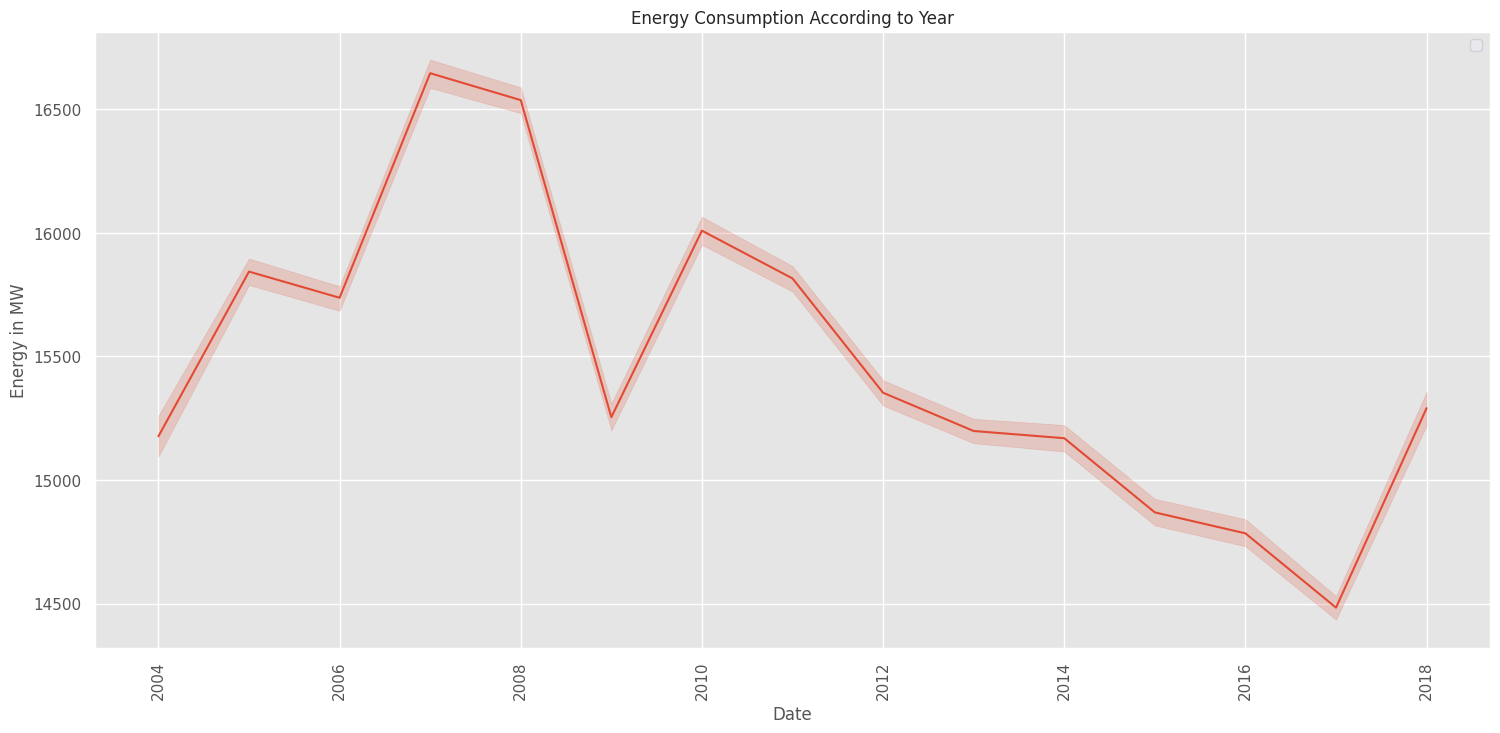

In [37]:
from matplotlib import style
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))
style.use('ggplot')
sns.lineplot(x=dataset["Year"],y=dataset["AEP_MW"],data =df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumption in Year 2004")
plt.xlabel('Date')
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()


for label in ax1.xaxis.get_ticklabels():
  label.set_rotation(90)

plt.title("Energy Consumption According to Year")

ploting a graphs for 3 years

                      AEP_MW  Month  Year        Date      Time  Week     Day
Datetime                                                                     
2004-12-31 01:00:00  13478.0     12  2004  2004-12-31  01:00:00    53  Friday
2004-12-31 02:00:00  12865.0     12  2004  2004-12-31  02:00:00    53  Friday
2004-12-31 03:00:00  12577.0     12  2004  2004-12-31  03:00:00    53  Friday
2004-12-31 04:00:00  12517.0     12  2004  2004-12-31  04:00:00    53  Friday
2004-12-31 05:00:00  12670.0     12  2004  2004-12-31  05:00:00    53  Friday
2004-12-31 06:00:00  13038.0     12  2004  2004-12-31  06:00:00    53  Friday
2004-12-31 07:00:00  13692.0     12  2004  2004-12-31  07:00:00    53  Friday


/tmp/ipython-input-38-3486029918.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


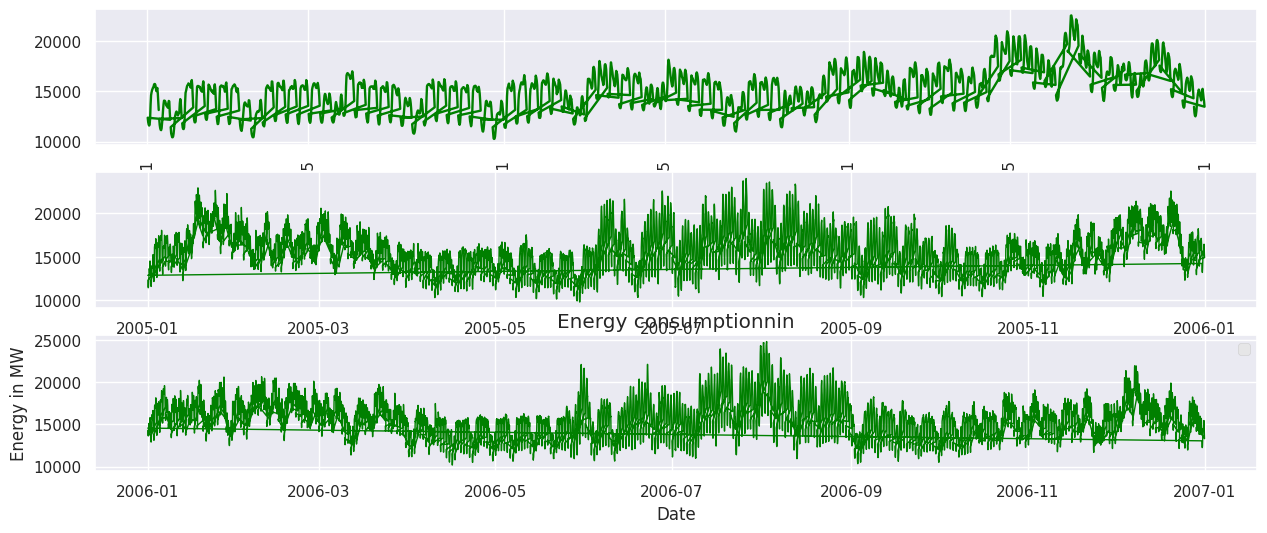

In [38]:
from matplotlib import style
import matplotlib.dates as mdates

fig = plt.figure()

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

style.use('ggplot')

# Filter data for each year
dataset_2004 = dataset[dataset.index.year == 2004]
dataset_2005 = dataset[dataset.index.year == 2005]
dataset_2006 = dataset[dataset.index.year == 2006]
print(dataset_2004.head(7))

# Plot data for each year
ax1.plot(dataset_2004.index, dataset_2004["AEP_MW"], color="green", linewidth=1.7)
ax2.plot(dataset_2005.index, dataset_2005["AEP_MW"], color="green", linewidth=1)
ax3.plot(dataset_2006.index, dataset_2006["AEP_MW"], color="green", linewidth=1)

plt.rcParams["figure.figsize"] = (18, 8)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()


for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

## Distribution of Energy

/tmp/ipython-input-39-2760412893.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["AEP_MW"])


Text(0.5, 1.0, 'Ennergy Distribution')

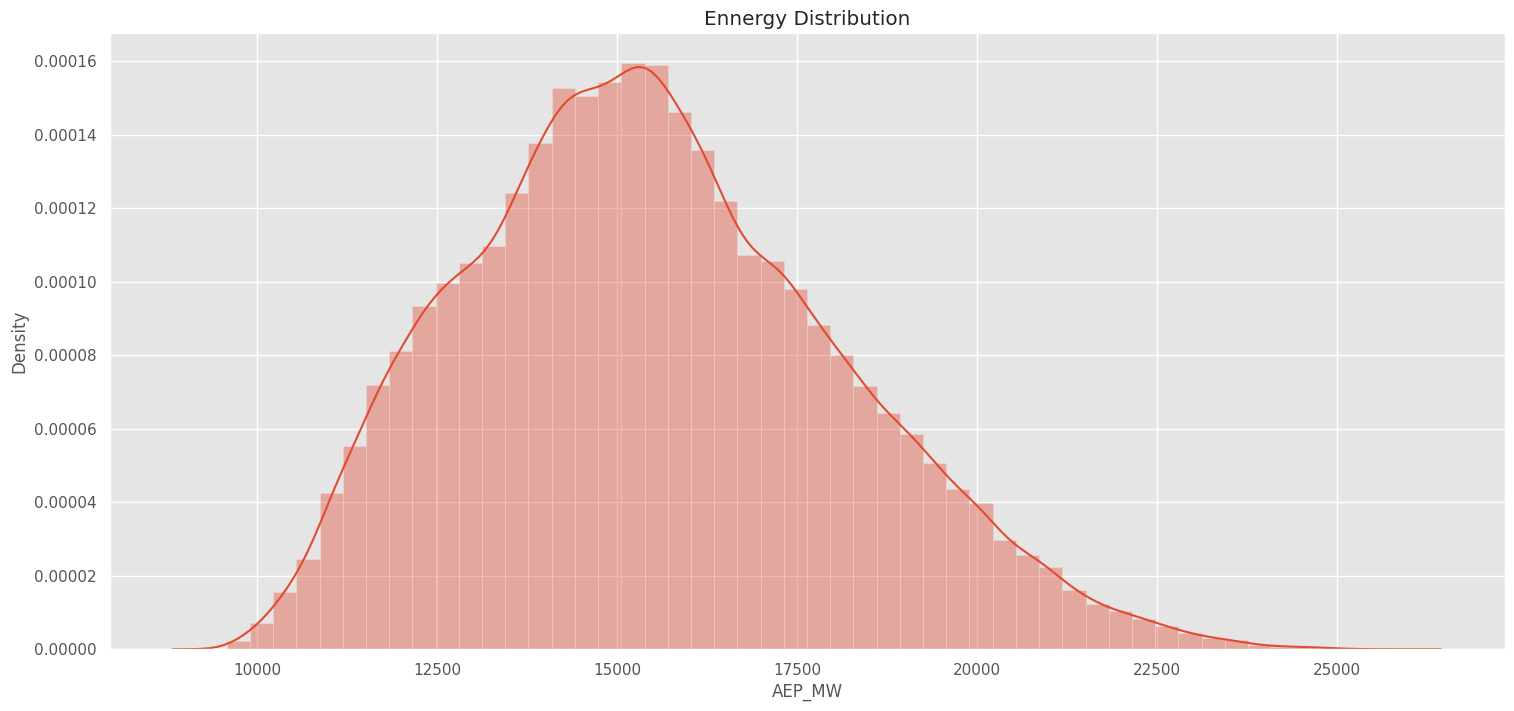

In [39]:
sns.distplot(dataset["AEP_MW"])
plt.title("Ennergy Distribution")

#### Energy consumption with respect to time

In [40]:

print(df.head(1))

              Datetime   AEP_MW  Month  Year        Date      Time  Week  \
0  2004-12-31 01:00:00  13478.0     12  2004  2004-12-31  01:00:00    53   

      Day  
0  Friday  


                      AEP_MW  Month  Year        Date      Time  Week     Day  \
Datetime                                                                        
2004-12-31 01:00:00  13478.0     12  2004  2004-12-31  01:00:00    53  Friday   

                     Hour  
Datetime                   
2004-12-31 01:00:00     1  


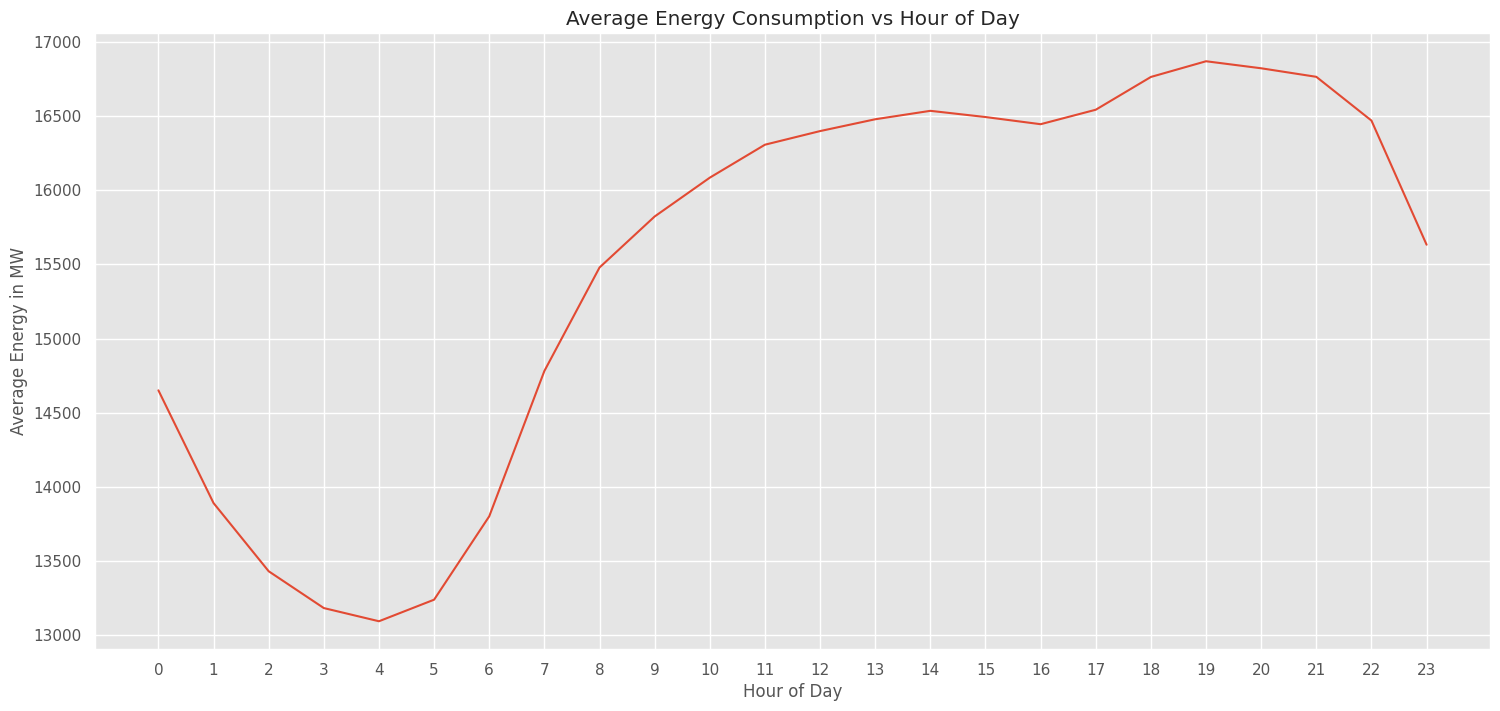

In [41]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

# Extract the hour from the Datetime index
dt = dataset
dt['Hour'] = dt.index.hour
print(dt.head(1))

# Calculate the average energy consumption for each hour
hourly_avg_consumption = dt.groupby('Hour')['AEP_MW'].mean()

# Plot the average energy consumption by hour
sns.lineplot(x=hourly_avg_consumption.index, y=hourly_avg_consumption.values)

plt.title("Average Energy Consumption vs Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Energy in MW")
plt.grid(True, alpha=1)
plt.xticks(hourly_avg_consumption.index) # Ensure all hours are shown on the x-axis

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(0) # Rotate labels back to horizontal for hours

Resampling the data


In [42]:
# Extract all Data Like Year MOnth Day Time etc
data = df
data["Month"] = pd.to_datetime(df["Datetime"]).dt.month
data["Year"] = pd.to_datetime(df["Datetime"]).dt.year
data["Date"] = pd.to_datetime(df["Datetime"]).dt.date
data["Time"] = pd.to_datetime(df["Datetime"]).dt.time
data["Week"] = pd.to_datetime(df["Datetime"]).dt.isocalendar().week
data["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
data = df.set_index("Datetime")
data.index = pd.to_datetime(dataset.index)
print(data.head())
print("*" * 100)
print(data.info())
data.columns



                      AEP_MW  Month  Year        Date      Time  Week     Day
Datetime                                                                     
2004-12-31 01:00:00  13478.0     12  2004  2004-12-31  01:00:00    53  Friday
2004-12-31 02:00:00  12865.0     12  2004  2004-12-31  02:00:00    53  Friday
2004-12-31 03:00:00  12577.0     12  2004  2004-12-31  03:00:00    53  Friday
2004-12-31 04:00:00  12517.0     12  2004  2004-12-31  04:00:00    53  Friday
2004-12-31 05:00:00  12670.0     12  2004  2004-12-31  05:00:00    53  Friday
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
 1   Month   121273 non-null  int32  
 2   Year    121273 non-null  int32  
 3   Date    121273

Index(['AEP_MW', 'Month', 'Year', 'Date', 'Time', 'Week', 'Day'], dtype='object')

In [43]:
NewDataSet = data[['AEP_MW', 'Month', 'Year', 'Week']].resample('D').mean()
NewDataSet.head(1)

,AEP_MW,Month,Year,Week
Datetime,,,,
2004-10-01,14284.521739,10.0,2004.0,40.0


In [44]:
print("=" * 100)
print(data.shape)
print("=" * 100)
print(NewDataSet.shape)

(121273, 7)
(5055, 4)


Splitting Data

In [45]:
TestData = NewDataSet.tail(60)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[: -60]

print(Training_Set.head())
print(Training_Set.shape)
print(TestData.shape)

                  AEP_MW
Datetime                
2004-10-01  14284.521739
2004-10-02  12999.875000
2004-10-03  12227.083333
2004-10-04  14309.041667
2004-10-05  14439.708333
(4995, 1)
(60, 4)


In [46]:
print("Training Set Shape", Training_Set.shape)
print("Test Set Shape", TestData.shape)

Training Set Shape (4995, 1)
Test Set Shape (60, 4)


In [47]:
from sklearn.preprocessing import MinMaxScaler

# Training_Set = Training_Set.values # Remove this line
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)
Train.shape

(4995, 1)

In [48]:
X_train = []
Y_train = []
 #Range should be from 60 Values to the End

for i in range(60,Train.shape[0]):

    #X_train 0-59
   X_train.append(Train[i-60:i])
   #Y train would be 60th VALUE BASED ON PAST 60 Values
   Y_train.append(Train[i,0])
#convert to Numpy array
X_train,Y_train = np.array(X_train),np.array(Y_train)
print(X_train.shape)
print(Y_train.shape)

(4935, 60, 1)
(4935,)


In [49]:
#Shape should be Number of [Datapoints,Steps,1]
# we convert into a 3d vector or #rd dimension
X_train = np.reshape(X_train,newshape=(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(4935, 60, 1)

## **MODEL**

In [32]:
# Option 1: If you are using TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense
regressor = Sequential()

# Adding the first LSTM layer and some   Dropout reqularisation
regressor.add(LSTM(units = 50,
                   return_sequences = True,
                   input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# Adding the Second LSTM layer and some   Dropout reqularisation
regressor.add(LSTM(units = 50,
                   return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and some   Dropout reqularisation
regressor.add(LSTM(units = 50,
                   return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and some   Dropout reqularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

#Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

#Fitting the RNN to the Training Set
regressor.fit(X_train,Y_train,epochs=100,batch_size=32)





# Option 2: If you are using a standalone Keras installation
# from keras.models import Sequential

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 43s 174ms/step - loss: 0.0344
Epoch 2/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - loss: 0.0186
Epoch 3/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - loss: 0.0181
Epoch 4/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - loss: 0.0162
Epoch 5/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 42s 140ms/step - loss: 0.0174
Epoch 6/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - loss: 0.0152
Epoch 7/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - loss: 0.0150
Epoch 8/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - loss: 0.0143
Epoch 9/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - loss: 0.0110
Epoch 10/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 41s 138ms/step - loss: 0.0100
Epoch 11/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - loss: 0.0092
Epoch 12/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - loss: 0.0085
Epoch 13/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - loss: 0.0081
Epoch 14/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - loss: 0.0083
E

## Test Data

In [50]:
TestData.head()


,AEP_MW,Month,Year,Week
Datetime,,,,
2018-06-05,13776.958333,6.0,2018.0,23.0
2018-06-06,13451.041667,6.0,2018.0,23.0
2018-06-07,14394.416667,6.0,2018.0,23.0
2018-06-08,15040.041667,6.0,2018.0,23.0
2018-06-09,14359.875000,6.0,2018.0,23.0


In [51]:
TestData.shape

(60, 4)

In [52]:
NewDataSet.shape

(5055, 4)

In [55]:
Df_Total = pd.concat([NewDataSet[["AEP_MW"]],TestData[["AEP_MW"]]],axis=0)
Df_Total.shape

(5115, 1)

In [56]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(120, 1)

In [62]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
# The loop should run for the number of test data points
for i in range(60, 60 + len(TestData)):
    X_test.append(inputs[i-60:i, 0]) # Select the single feature
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network - Add the batch size dimension
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [63]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

In [66]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

## Future Predicted

In [68]:
Machine_Df.head()

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-06-05,13776.958333,13429.196289
1,2018-06-06,13451.041667,13543.189453
2,2018-06-07,14394.416667,15192.729492
3,2018-06-08,15040.041667,14740.286133
4,2018-06-09,14359.875000,15136.554688


In [70]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

/tmp/ipython-input-71-3048159653.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


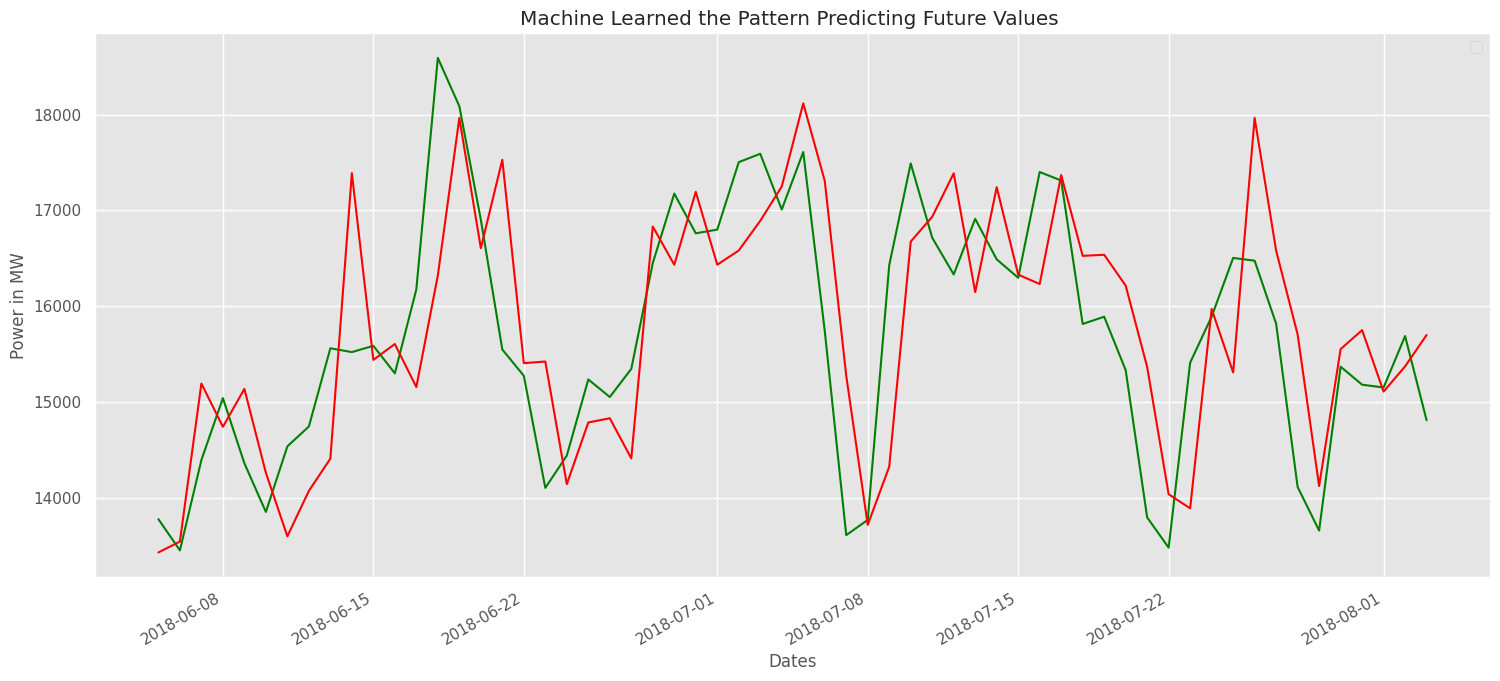

In [71]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()